# Cardiovascular Risk from Bangladesh #

In [57]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)



In [58]:
import pandas as pd
url_string = 'https://github.com/Bishwaprotapi/Cardiovascular-Disease-Risk-Classification-Using-Machine-Learning-Techniques/blob/main/CVD_Dataset.csv'

In [59]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('CVD_Dataset.csv')
df

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.100,1.710,23.600,86.200,125/79,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,171.000,0.504,125.0,79.0,Elevated,140.0,17.930
1,F,55.0,118.700,1.690,41.600,82.500,139/70,162.0,50.0,135.0,Y,Y,High,Y,HIGH,169.000,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.510
2,M,NaN,NaN,1.830,26.900,106.700,104/77,103.0,73.0,114.0,N,N,High,Y,INTERMEDIARY,183.000,0.583,104.0,77.0,Normal,0.0,12.640
3,M,44.0,108.300,1.800,33.400,96.600,140/83,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.360
4,F,32.0,99.500,1.860,28.800,102.700,144/83,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,186.000,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,F,40.0,72.070,1.889,NaN,95.326,119/66,157.0,60.0,93.0,N,N,Moderate,Y,LOW,188.894,0.505,119.0,66.0,Normal,67.0,14.300
1525,F,78.0,85.877,1.825,24.426,112.340,102/115,241.0,84.0,NaN,Y,N,Low,N,INTERMEDIARY,182.485,0.616,102.0,115.0,Hypertension Stage 2,127.0,14.805
1526,M,39.0,98.626,1.521,20.055,77.193,150/90,237.0,82.0,147.0,N,Y,High,N,INTERMEDIARY,152.119,0.507,150.0,90.0,Hypertension Stage 2,125.0,18.251
1527,M,71.0,116.163,1.841,29.279,114.197,112/63,193.0,84.0,123.0,N,N,High,Y,INTERMEDIARY,184.059,0.620,112.0,63.0,Normal,79.0,15.316


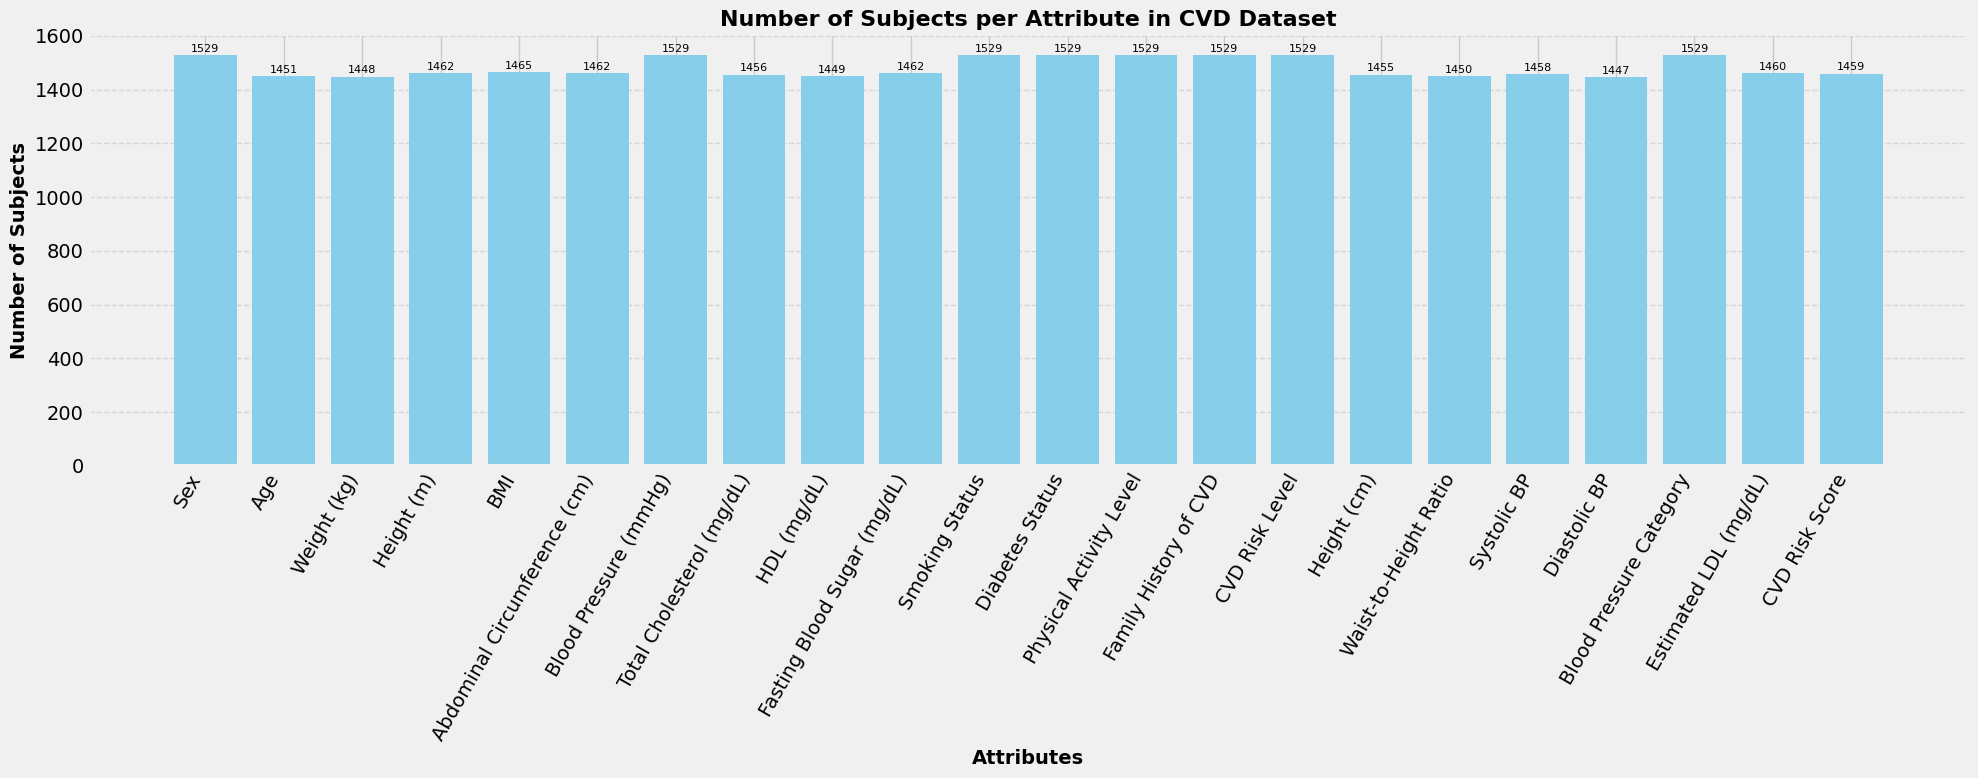

In [92]:
# CVD Dataset Structure: Number of Subjects per Attribute

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('CVD_Dataset.csv')

# Count the number of non-null entries for each column
attribute_counts = df.notnull().sum()

# Plotting
plt.figure(figsize=(20, 8))
bars = plt.bar(attribute_counts.index, attribute_counts.values, color='skyblue')

# Adding counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.xticks(rotation=60, ha='right')
plt.xlabel('Attributes', fontsize=14, weight='bold')
plt.ylabel('Number of Subjects', fontsize=14, weight='bold')
plt.title('Number of Subjects per Attribute in CVD Dataset', fontsize=16, weight='bold')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Data Preprocessing #
The following steps are performed on the dataset in this section:

- Dropping Redudant Columns
- Checking For Duplicated Rows
- Checking For Missing Values

In [60]:
df.head(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,Y,Y,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,N,N,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88
5,F,58.0,117.9,1.87,33.7,81.4,142/90,156.0,67.0,82.0,Y,N,Moderate,Y,HIGH,187.0,0.435,142.0,90.0,Hypertension Stage 2,59.0,16.96
6,M,33.0,117.9,1.82,35.6,74.8,96/63,184.0,66.0,87.0,N,Y,Low,N,INTERMEDIARY,182.0,0.411,96.0,63.0,Normal,88.0,17.60
7,M,55.0,100.1,1.74,33.1,96.6,115/73,287.0,40.0,96.0,Y,N,Moderate,N,HIGH,174.0,0.555,115.0,73.0,Normal,217.0,18.11
8,F,37.0,110.1,1.86,31.8,92.4,107/95,177.0,68.0,70.0,Y,N,High,N,INTERMEDIARY,186.0,0.497,NaN,95.0,Hypertension Stage 2,79.0,15.25
9,F,58.0,97.6,1.86,28.2,74.6,133/83,281.0,68.0,126.0,N,N,Moderate,N,INTERMEDIARY,186.0,0.401,133.0,83.0,Hypertension Stage 1,183.0,17.91


In [61]:
df.tail(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
1519,F,53.0,101.530,1.727,35.423,110.121,143/67,174.0,38.0,161.0,Y,Y,High,Y,HIGH,172.657,0.638,143.0,67.0,Hypertension Stage 2,106.0,19.715
1520,M,29.0,89.388,1.716,26.208,78.400,165/72,223.0,49.0,94.0,N,Y,Low,N,LOW,171.635,0.457,165.0,72.0,Hypertension Stage 2,144.0,19.952
1521,F,48.0,116.299,1.665,23.504,107.219,97/74,216.0,82.0,168.0,Y,Y,Moderate,N,LOW,166.474,0.644,97.0,74.0,Normal,104.0,15.871
1522,F,41.0,117.365,1.748,38.310,118.246,105/87,200.0,35.0,87.0,Y,Y,High,N,INTERMEDIARY,174.814,0.676,105.0,87.0,Hypertension Stage 1,135.0,18.912
1523,M,63.0,91.625,1.702,35.278,NaN,162/60,189.0,76.0,153.0,N,Y,Moderate,N,INTERMEDIARY,NaN,0.601,162.0,60.0,Hypertension Stage 2,83.0,20.936
1524,F,40.0,72.070,1.889,NaN,95.326,119/66,157.0,60.0,93.0,N,N,Moderate,Y,LOW,188.894,0.505,119.0,66.0,Normal,67.0,14.300
1525,F,78.0,85.877,1.825,24.426,112.340,102/115,241.0,84.0,NaN,Y,N,Low,N,INTERMEDIARY,182.485,0.616,102.0,115.0,Hypertension Stage 2,127.0,14.805
1526,M,39.0,98.626,1.521,20.055,77.193,150/90,237.0,82.0,147.0,N,Y,High,N,INTERMEDIARY,152.119,0.507,150.0,90.0,Hypertension Stage 2,125.0,18.251
1527,M,71.0,116.163,1.841,29.279,114.197,112/63,193.0,84.0,123.0,N,N,High,Y,INTERMEDIARY,184.059,0.620,112.0,63.0,Normal,79.0,15.316
1528,F,78.0,111.627,1.867,22.017,97.692,134/67,218.0,68.0,166.0,N,N,High,N,HIGH,186.735,0.523,134.0,67.0,Hypertension Stage 1,120.0,15.463


In [93]:
df.drop(columns=['Height (cm)'], inplace=True)

In [94]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 21
Number of Instances In Dataset :  1529


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [103]:
df.head(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,Y,Y,High,Y,HIGH,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,N,N,High,Y,INTERMEDIARY,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88
5,F,58.0,117.9,1.87,33.7,81.4,142/90,156.0,67.0,82.0,Y,N,Moderate,Y,HIGH,0.435,142.0,90.0,Hypertension Stage 2,59.0,16.96
6,M,33.0,117.9,1.82,35.6,74.8,96/63,184.0,66.0,87.0,N,Y,Low,N,INTERMEDIARY,0.411,96.0,63.0,Normal,88.0,17.60
7,M,55.0,100.1,1.74,33.1,96.6,115/73,287.0,40.0,96.0,Y,N,Moderate,N,HIGH,0.555,115.0,73.0,Normal,217.0,18.11
8,F,37.0,110.1,1.86,31.8,92.4,107/95,177.0,68.0,70.0,Y,N,High,N,INTERMEDIARY,0.497,NaN,95.0,Hypertension Stage 2,79.0,15.25
9,F,58.0,97.6,1.86,28.2,74.6,133/83,281.0,68.0,126.0,N,N,Moderate,N,INTERMEDIARY,0.401,133.0,83.0,Hypertension Stage 1,183.0,17.91


In [104]:
df.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1451.000000,1448.000000,1462.000000,1465.000000,1462.000000,1456.000000,1449.000000,1462.000000,1450.000000,1458.000000,1447.000000,1460.000000,1459.000000
mean,47.025500,85.917427,1.754111,28.465997,91.773214,198.539148,56.197378,117.485636,0.525727,125.627572,82.917761,111.550685,16.960925
std,12.421063,21.012580,0.113090,7.038685,12.823573,57.794099,16.066754,30.289174,0.081213,22.112099,14.731277,58.866220,2.436192
min,25.000000,50.100000,1.502000,15.000000,70.000000,100.000000,30.000000,70.000000,0.360000,90.000000,60.000000,-18.000000,10.530000
25%,37.000000,67.050000,1.660000,22.629000,80.500000,150.000000,42.000000,92.000000,0.460000,107.000000,71.000000,61.000000,15.205000
50%,46.000000,86.614500,1.755000,28.159000,91.600000,197.000000,56.000000,115.000000,0.522000,125.000000,82.000000,109.000000,16.880000
75%,55.000000,105.000000,1.845500,34.000000,102.269000,249.000000,70.000000,138.000000,0.583750,141.000000,93.000000,159.000000,18.630000
max,79.000000,120.000000,2.000000,46.200000,119.996000,300.000000,89.000000,198.000000,0.787000,179.000000,119.000000,237.000000,24.170000


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [106]:
# Convert necessary columns to numerical type for this project
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Weight (kg)'] = pd.to_numeric(df['Weight (kg)'], errors='coerce')
df['Height (m)'] = pd.to_numeric(df['Height (m)'], errors='coerce')
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df['Abdominal Circumference (cm)'] = pd.to_numeric(df['Abdominal Circumference (cm)'], errors='coerce')
df['Blood Pressure (mmHg)'] = pd.to_numeric(df['Blood Pressure (mmHg)'], errors='coerce')
df['Total Cholesterol (mg/dL)'] = pd.to_numeric(df['Total Cholesterol (mg/dL)'], errors='coerce')
df['HDL (mg/dL)'] = pd.to_numeric(df['HDL (mg/dL)'], errors='coerce')
df['Fasting Blood Sugar (mg/dL)'] = pd.to_numeric(df['Fasting Blood Sugar (mg/dL)'], errors='coerce')
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'], errors='coerce')
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'], errors='coerce')
df['Estimated LDL (mg/dL)'] = pd.to_numeric(df['Estimated LDL (mg/dL)'], errors='coerce')
df['CVD Risk Score'] = pd.to_numeric(df['CVD Risk Score'], errors='coerce')
df['Waist-to-Height Ratio'] = pd.to_numeric(df['Waist-to-Height Ratio'], errors='coerce')



In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         0 non-null      float64
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [108]:
# Extracting categorical and numerical columns for this project
categorical_columns = ['Sex', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level', 'Blood Pressure Category']
numerical_columns = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Systolic BP', 'Diastolic BP', 'Estimated LDL (mg/dL)', 'CVD Risk Score', 'Waist-to-Height Ratio']



In [109]:
# Looking at unique values in categorical columns for this project
for column in categorical_columns:
    print(f"Unique values in {column} for this project: {df[column].unique()}")



Unique values in Sex for this project: ['F' 'M']
Unique values in Smoking Status for this project: ['N' 'Y']
Unique values in Diabetes Status for this project: ['Y' 'N']
Unique values in Physical Activity Level for this project: ['Low' 'High' 'Moderate']
Unique values in Family History of CVD for this project: ['N' 'Y']
Unique values in CVD Risk Level for this project: ['INTERMEDIARY' 'HIGH' 'LOW']
Unique values in Blood Pressure Category for this project: ['Elevated' 'Hypertension Stage 1' 'Normal' 'Hypertension Stage 2']


In [111]:
df['Sex'] = df['Sex'].replace('Y', pd.NA)
df['Sex'] = df['Sex'].replace('M', 'Male')
df['Sex'] = df['Sex'].replace('F', 'Female')


In [113]:
if 'classification' in df.columns:
    df['classification'] = df['classification'].map({'cvd': 0, 'not cvd': 1})
    df['classification'] = pd.to_numeric(df['classification'], errors='coerce')
else:
    print("The column 'classification' does not exist in the DataFrame.")

The column 'classification' does not exist in the DataFrame.


# Exploratry Data Analysis #

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

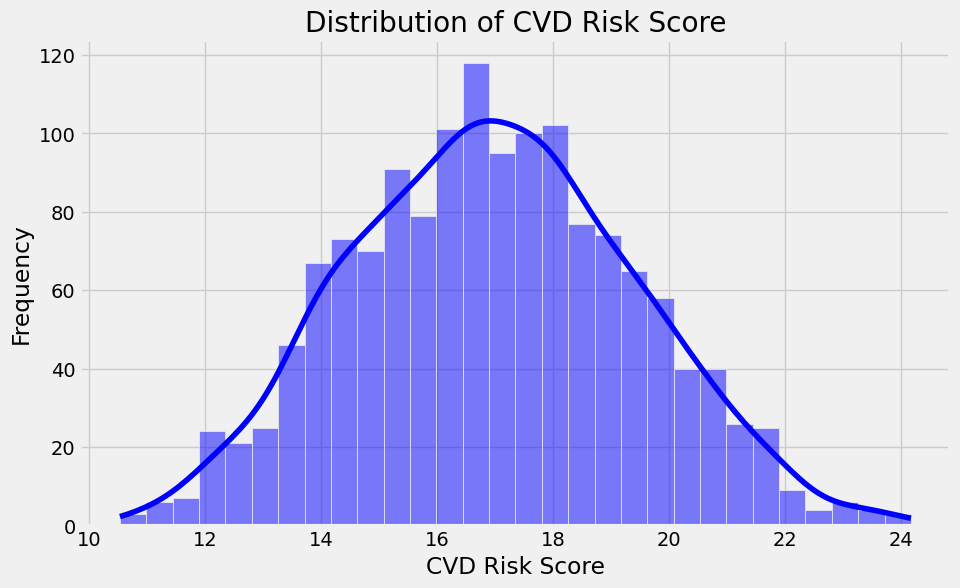

In [115]:
# Plotting the distribution of CVD Risk Score
plt.figure(figsize=(10, 6))
sns.histplot(df['CVD Risk Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of CVD Risk Score')
plt.xlabel('CVD Risk Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


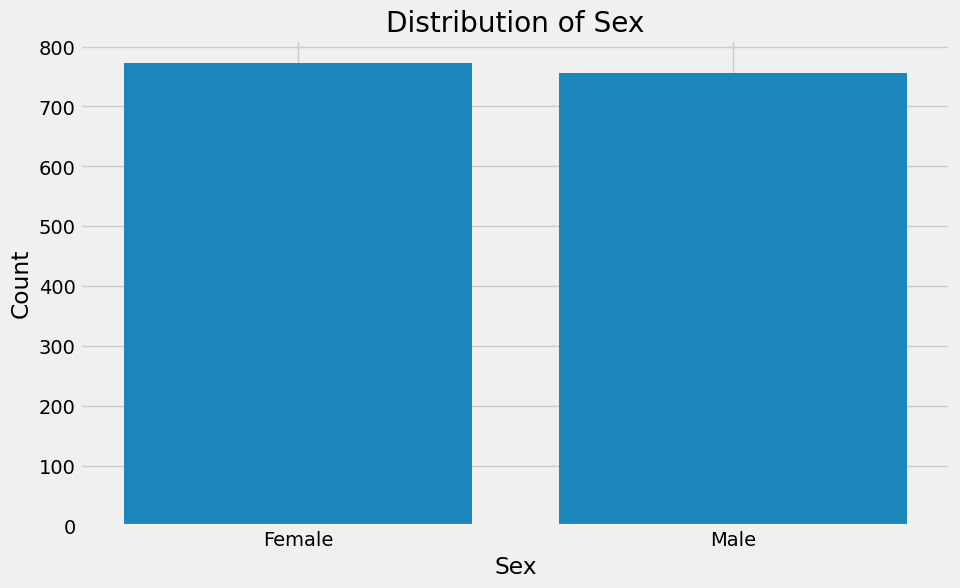

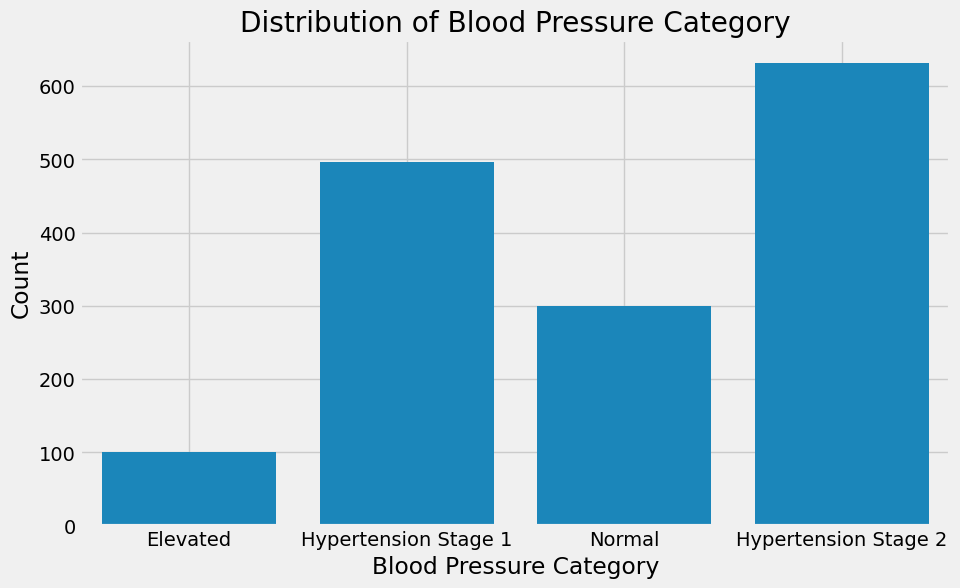

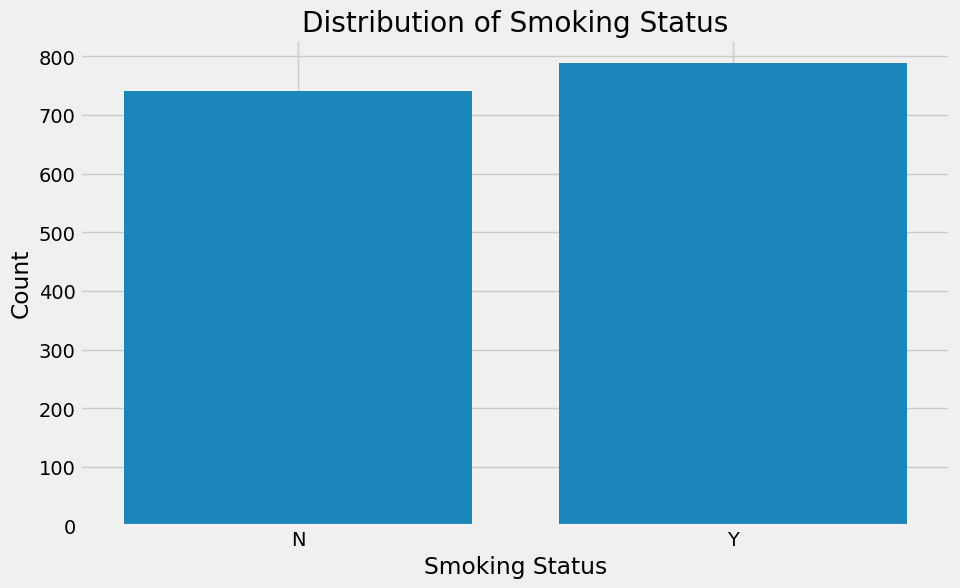

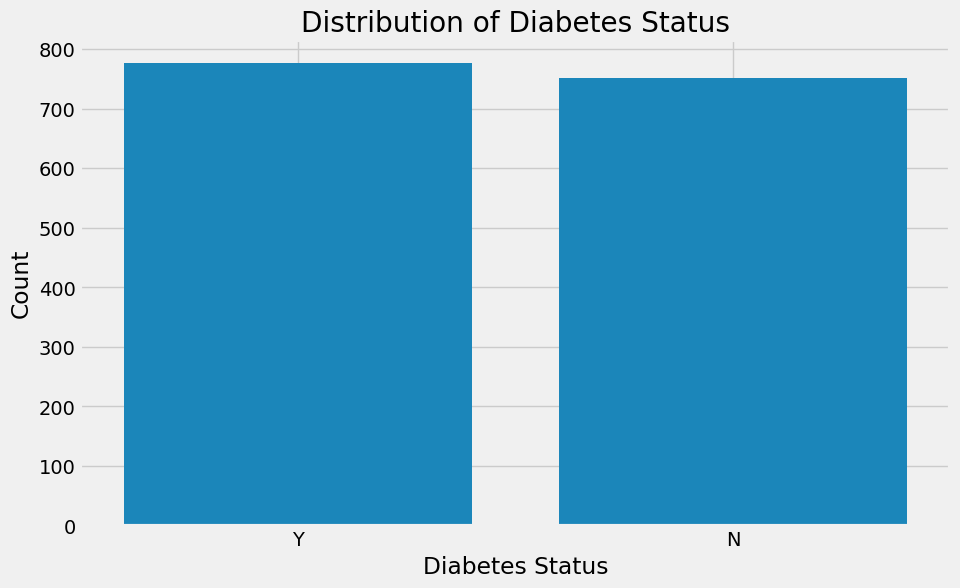

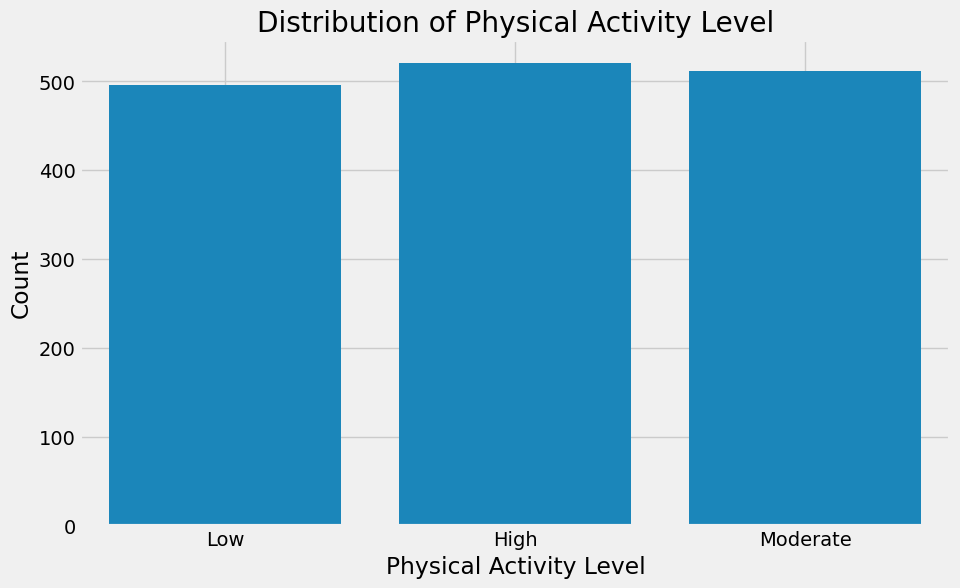

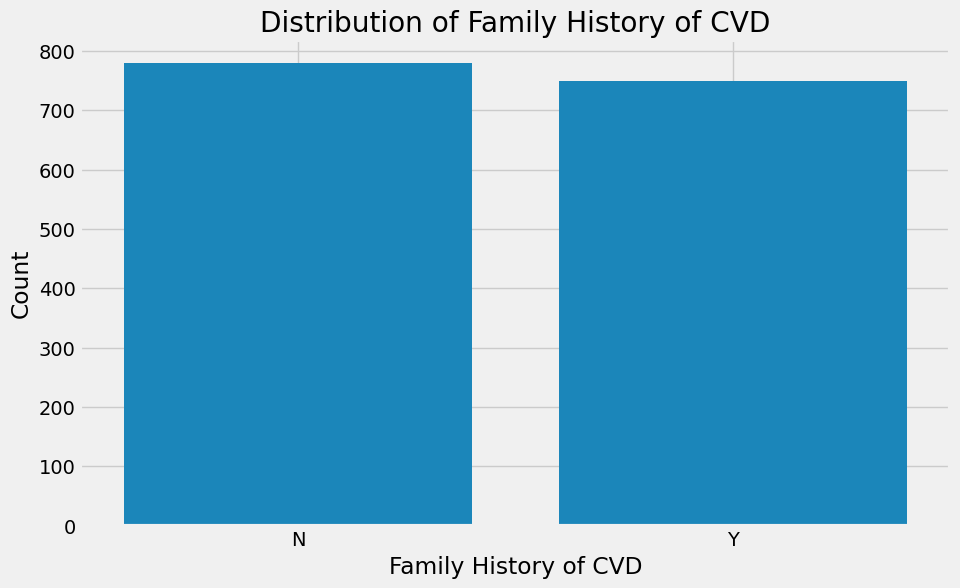

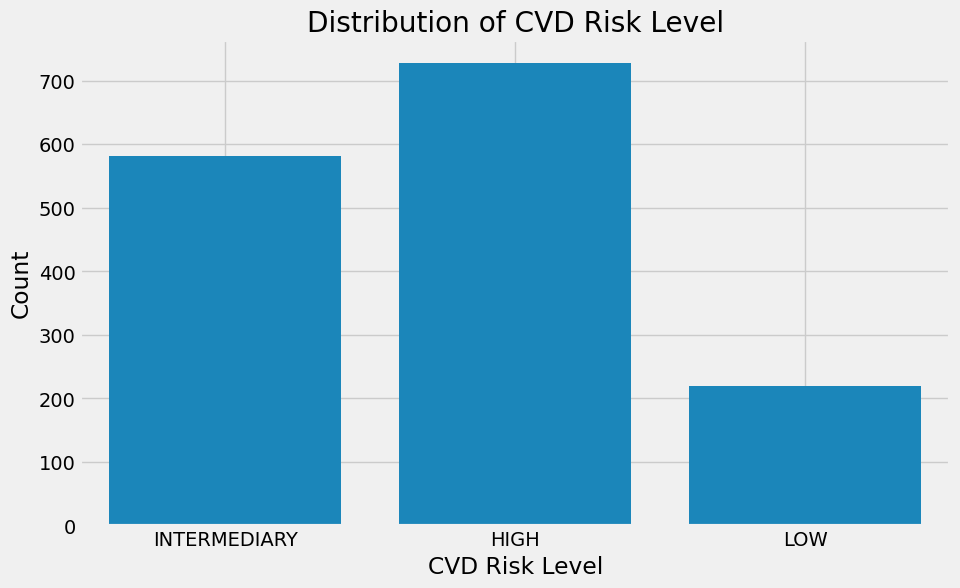

In [116]:
# Analyzing categorical columns
categorical_columns = ['Sex', 'Blood Pressure Category', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


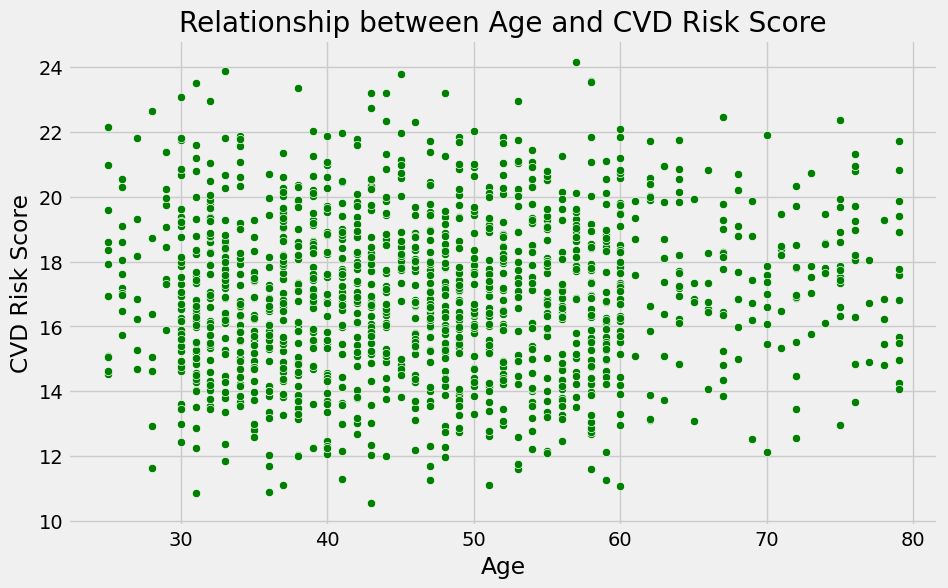

In [117]:
# Analyzing the relationship between Age and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='CVD Risk Score', data=df, color='green')
plt.title('Relationship between Age and CVD Risk Score')
plt.xlabel('Age')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

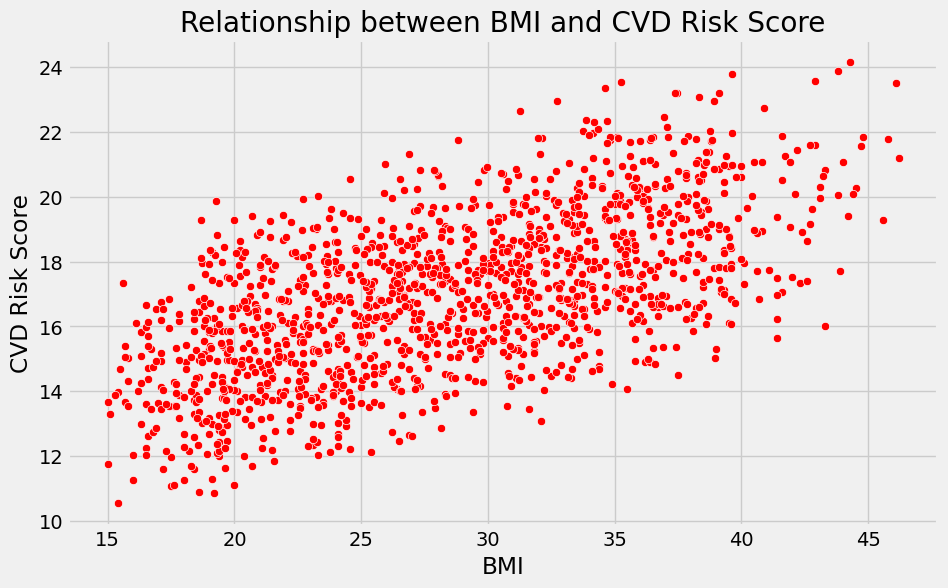

In [75]:
# Analyzing the relationship between BMI and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='CVD Risk Score', data=df, color='red')
plt.title('Relationship between BMI and CVD Risk Score')
plt.xlabel('BMI')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

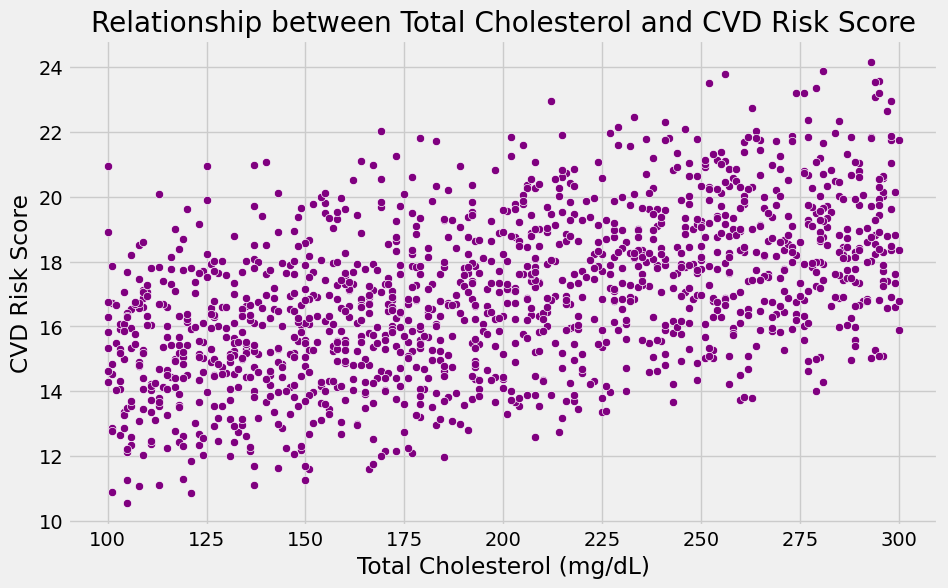

In [76]:
# Analyzing the relationship between Total Cholesterol and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Cholesterol (mg/dL)', y='CVD Risk Score', data=df, color='purple')
plt.title('Relationship between Total Cholesterol and CVD Risk Score')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

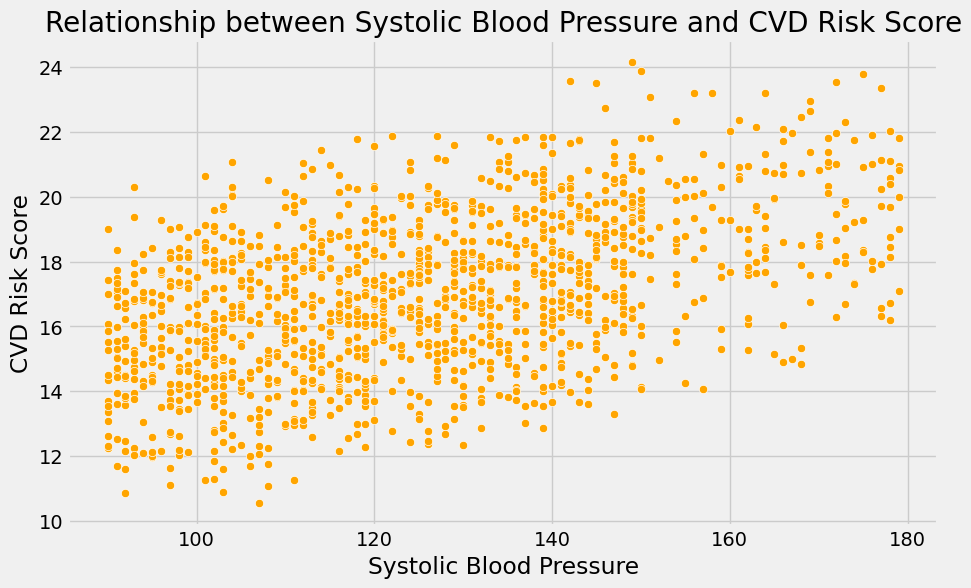

In [77]:
# Analyzing the relationship between Blood Pressure and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Systolic BP', y='CVD Risk Score', data=df, color='orange')
plt.title('Relationship between Systolic Blood Pressure and CVD Risk Score')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()


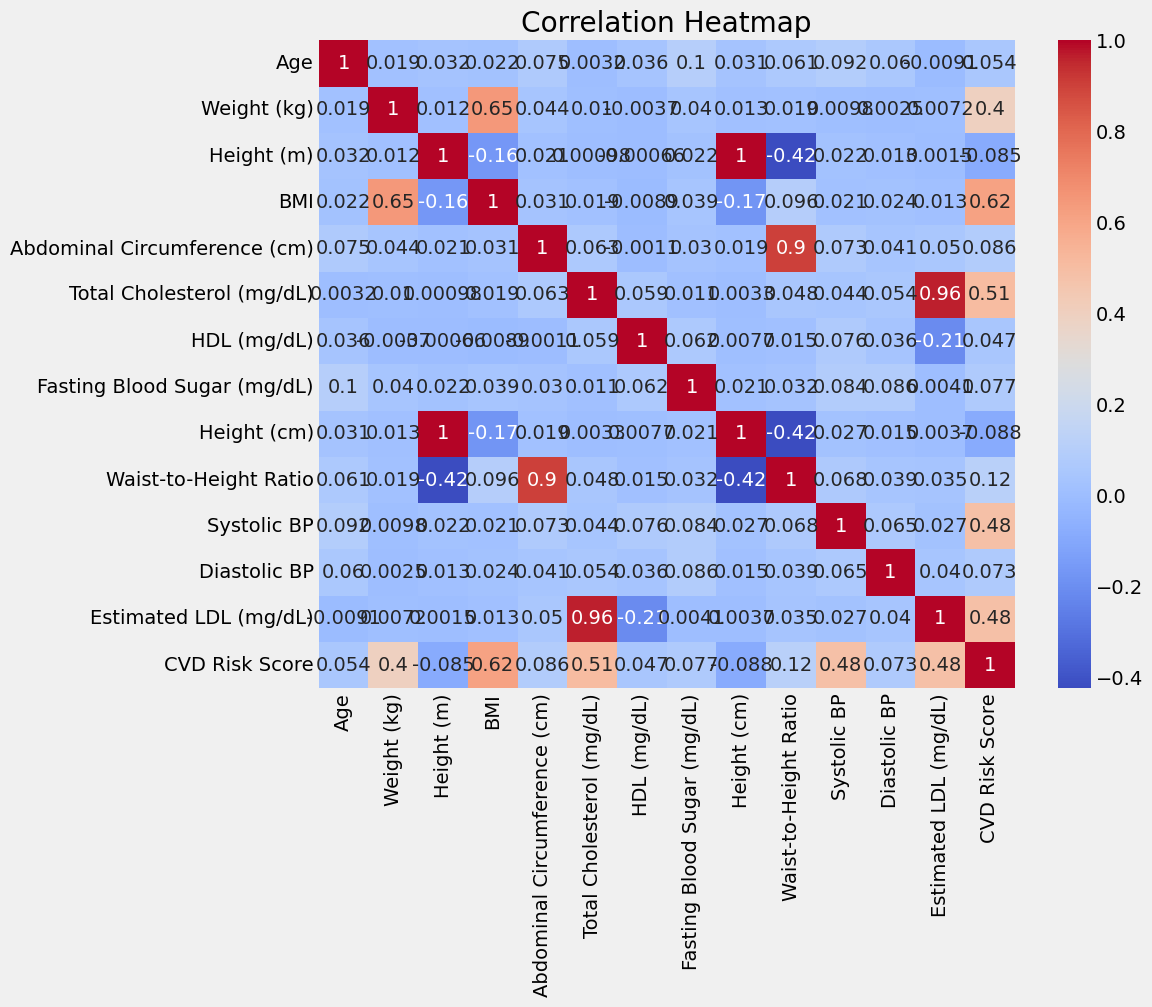

In [78]:
# Correlation Heatmap
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


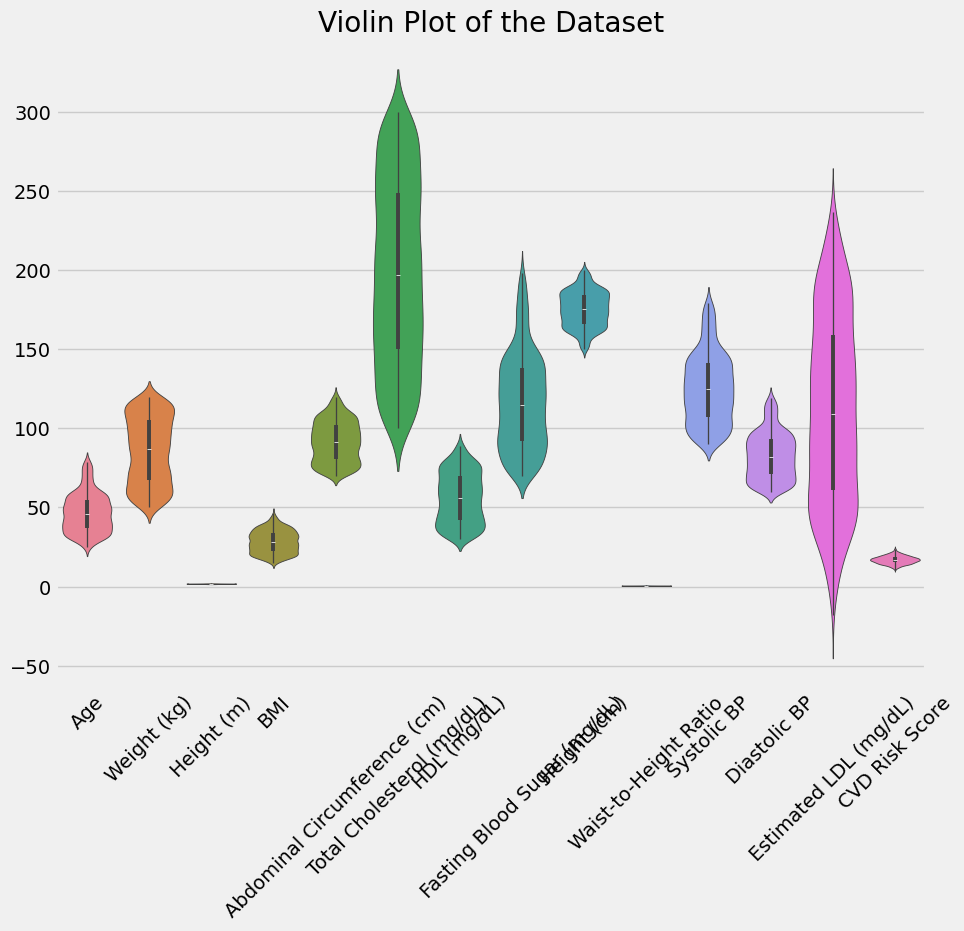

In [79]:
# Violin Plot of the Dataset
plt.figure(figsize=(10, 8))
sns.violinplot(data=df)
plt.title('Violin Plot of the Dataset')
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x800 with 0 Axes>

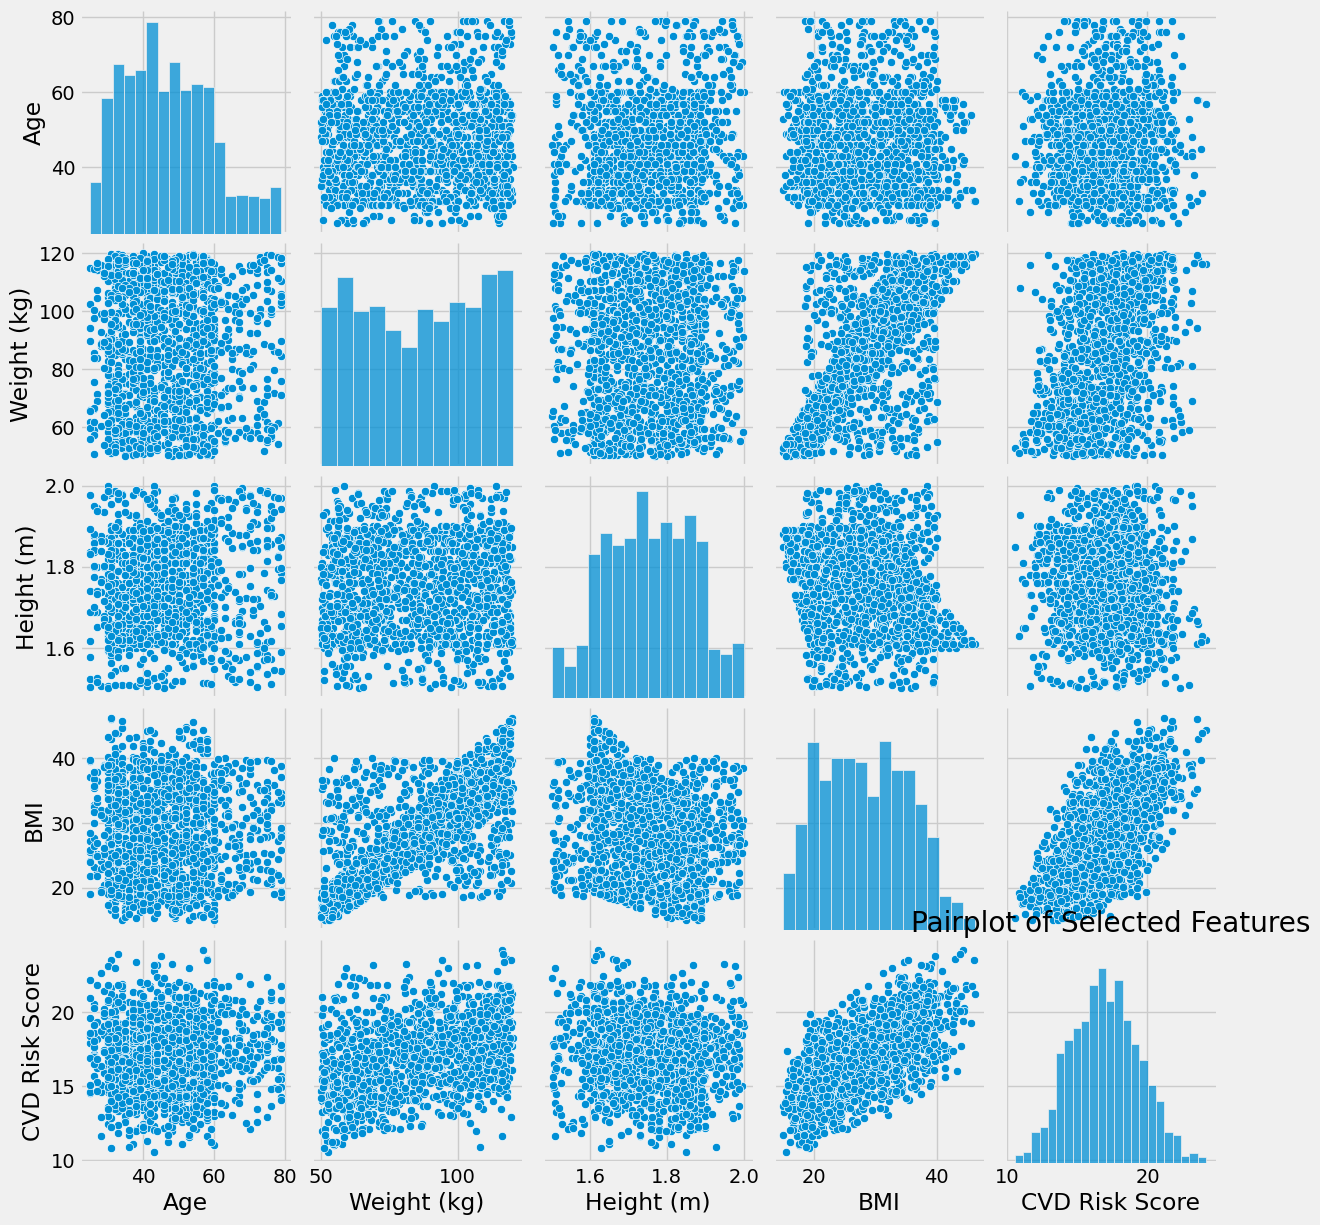

In [80]:
# Pairplot of Selected Features
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'CVD Risk Score']], markers=['o', 's', 'D'])
plt.title('Pairplot of Selected Features')
plt.show()



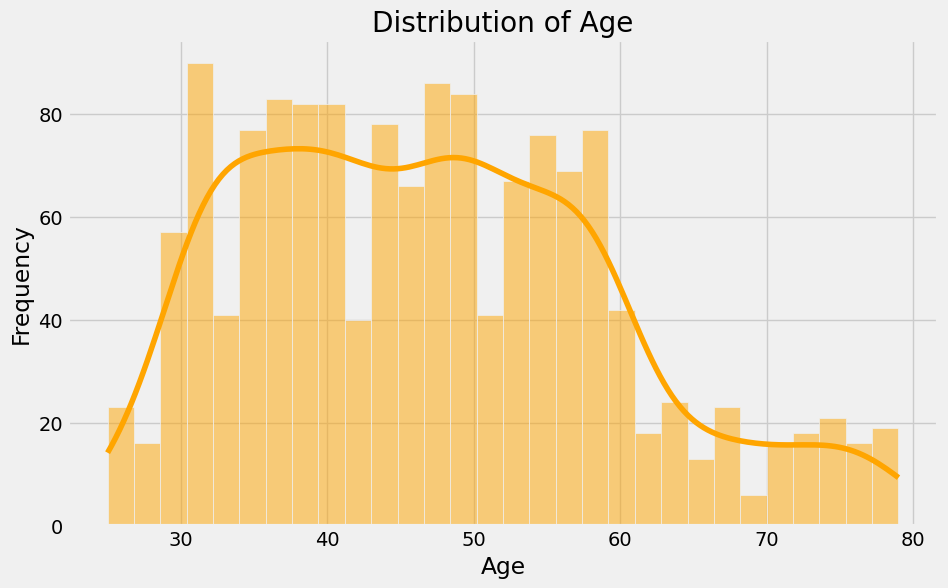

In [81]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

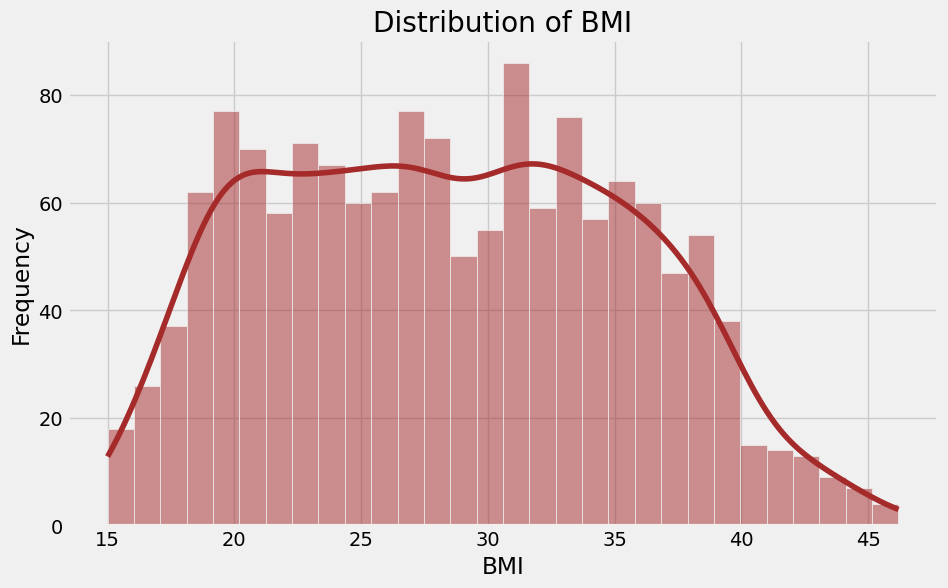

In [82]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='brown')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

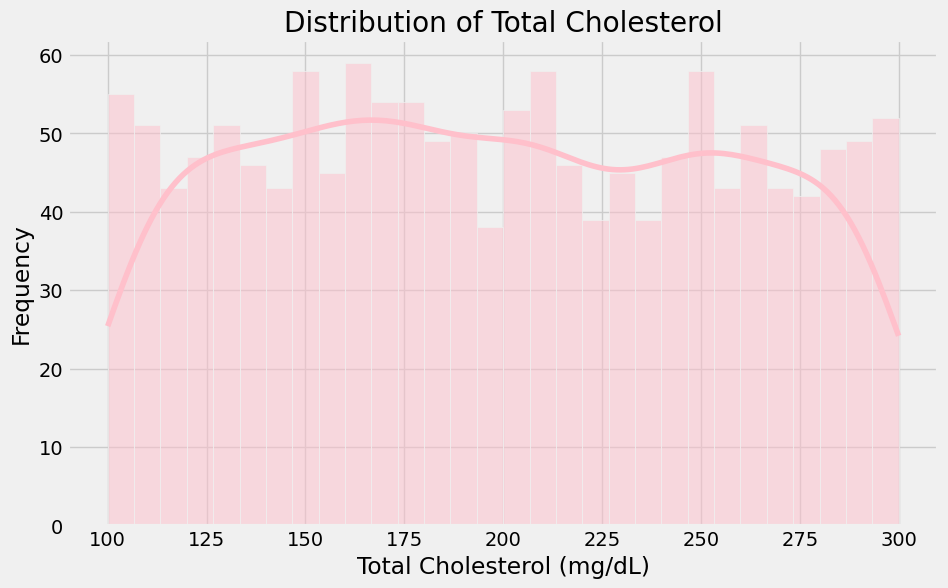

In [83]:
# Distribution of Total Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Cholesterol (mg/dL)'], bins=30, kde=True, color='pink')
plt.title('Distribution of Total Cholesterol')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

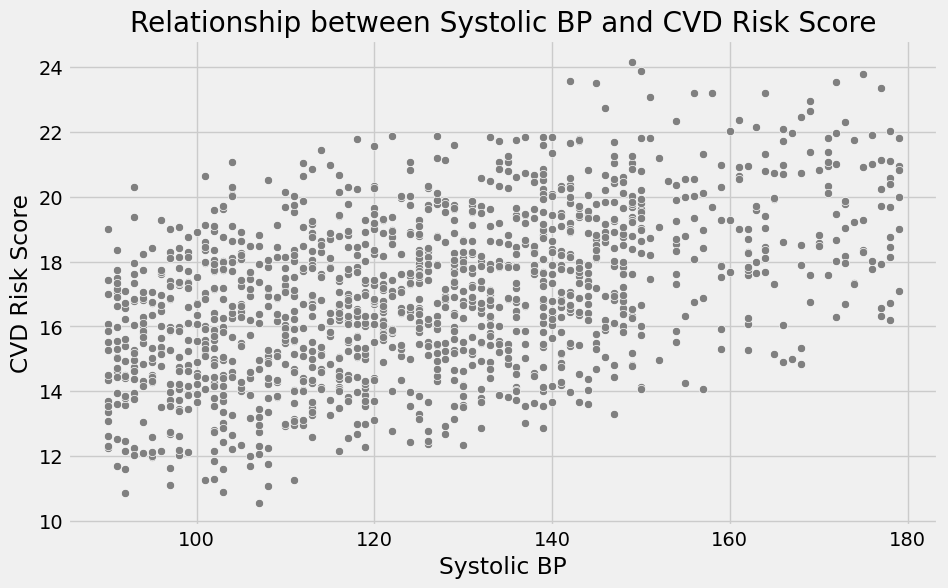

In [84]:
# Relationship between Systolic BP and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Systolic BP', y='CVD Risk Score', data=df, color='gray')
plt.title('Relationship between Systolic BP and CVD Risk Score')
plt.xlabel('Systolic BP')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

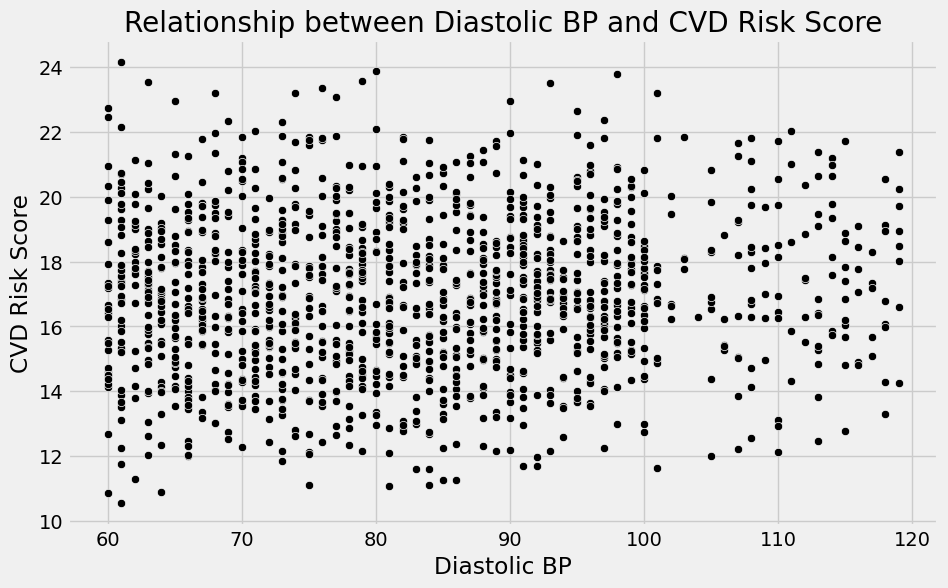

In [85]:
# Relationship between Diastolic BP and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diastolic BP', y='CVD Risk Score', data=df, color='black')
plt.title('Relationship between Diastolic BP and CVD Risk Score')
plt.xlabel('Diastolic BP')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

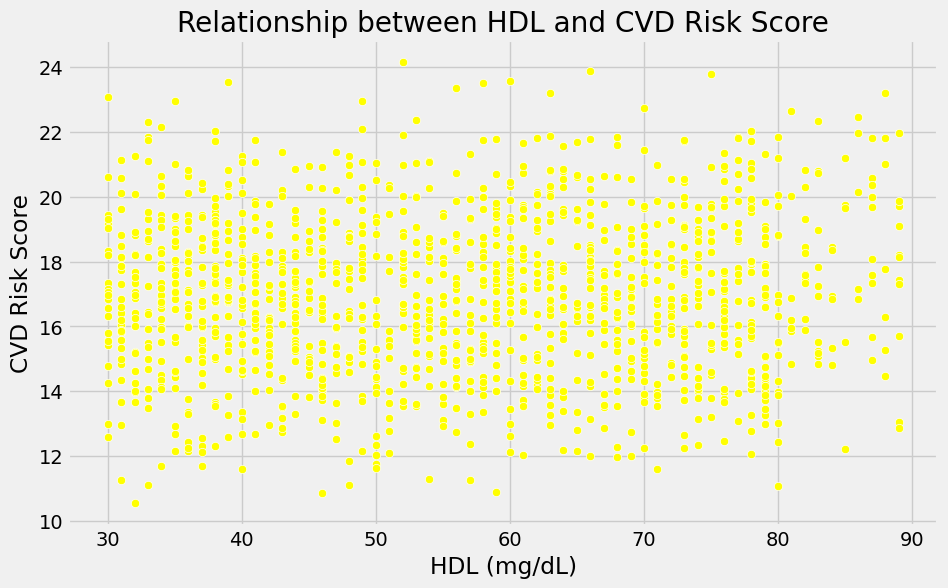

In [86]:
# Relationship between HDL and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDL (mg/dL)', y='CVD Risk Score', data=df, color='yellow')
plt.title('Relationship between HDL and CVD Risk Score')
plt.xlabel('HDL (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

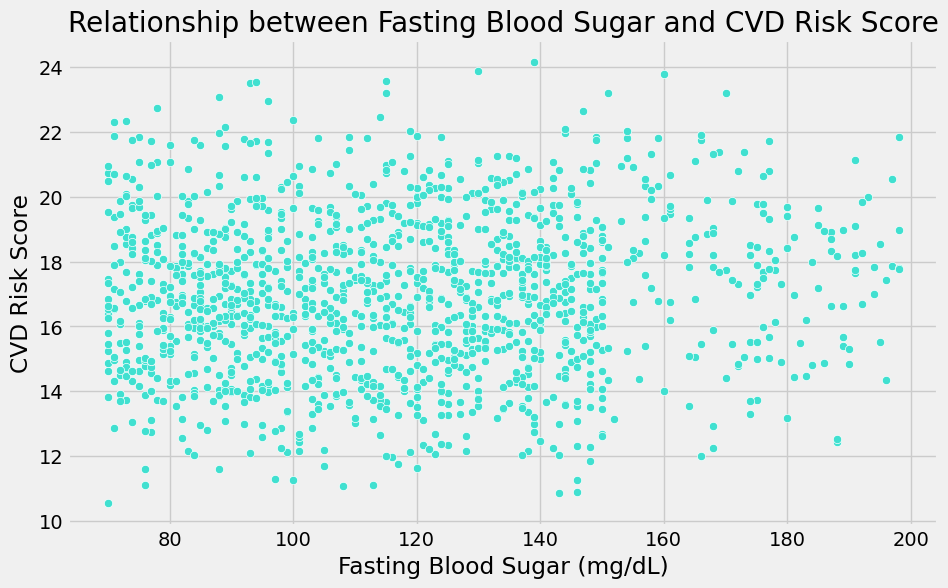

In [87]:
# Relationship between Fasting Blood Sugar and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fasting Blood Sugar (mg/dL)', y='CVD Risk Score', data=df, color='turquoise')
plt.title('Relationship between Fasting Blood Sugar and CVD Risk Score')
plt.xlabel('Fasting Blood Sugar (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, error_score='raise')

# Define X_train and y_train
from sklearn.model_selection import train_test_split
X = df.drop('CVD Risk Level', axis=1)
y = df['CVD Risk Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical variables to numerical variables
label_encoder = LabelEncoder()
X_train['Sex'] = label_encoder.fit_transform(X_train['Sex'])
X_test['Sex'] = label_encoder.transform(X_test['Sex'])

# Convert 'Blood Pressure (mmHg)' column to float
X_train['Blood Pressure (mmHg)'] = X_train['Blood Pressure (mmHg)'].apply(lambda x: float(x.split('/')[0]) if isinstance(x, str) else x)
X_test['Blood Pressure (mmHg)'] = X_test['Blood Pressure (mmHg)'].apply(lambda x: float(x.split('/')[0]) if isinstance(x, str) else x)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print(grid_search.best_params_)

# Print the best score
print(grid_search.best_score_)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


ValueError: could not convert string to float: 'Y'

### Balancing Dataset ###

In [194]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [195]:
# Split the dataset into features and target
X = df.drop('CVD Risk Level', axis=1)
y = df['CVD Risk Level']

In [196]:
# Convert categorical variables to numerical variables
X = pd.get_dummies(X, drop_first=True)

In [197]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [198]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [199]:
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

In [200]:
# Oversample the minority class
X_res, y_res = smote.fit_resample(X_train_imputed, y_train)

In [201]:
# Initialize the StandardScaler object
scaler = StandardScaler()

In [202]:
# Scale the features
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test_imputed)

In [203]:
df.columns

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Height (cm)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score'],
      dtype='object')

## Machine Learning Model Training #
In this section, we have trained and evaluated the following Machine Learning Models to predict Parkinson's disease diagnosis:

- Decision Tree Classifier: This model is simple to implement and interpret, but can be prone to overfitting.
- Random Forest Classifier: This ensemble model combines multiple decision trees to improve accuracy and reduce overfitting.
- Logistic Regression: This linear model is suitable for binary classification problems and provides interpretable coefficients.
- SVM (Support Vector Machine): This model is effective in high-dimensional spaces and can handle non-linear relationships.
- Naive Bayes: This family of probabilistic models is simple to implement and can handle categorical features.
- KNN Classifier: This model is based on the idea that similar instances should have similar labels.
- XGBoost Classifier: This gradient boosting model is known for its high accuracy and speed in handling large datasets.

Decision Tree
Random Forest
Logistic Regression
SVM (Support Vector Machine)
Naive Bayes
KNN Classifier
XGBoost

### Decision Tree ###

In [267]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Train the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=60, max_depth=80, min_samples_split=80, min_samples_leaf=30)
clf.fit(X_res_scaled, y_res)

# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report for Decision Tree Classifier:")
print(report)



Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.62      0.74      0.67       144
           1       0.61      0.45      0.52       118
           2       0.33      0.36      0.35        44

    accuracy                           0.57       306
   macro avg       0.52      0.52      0.51       306
weighted avg       0.57      0.57      0.57       306



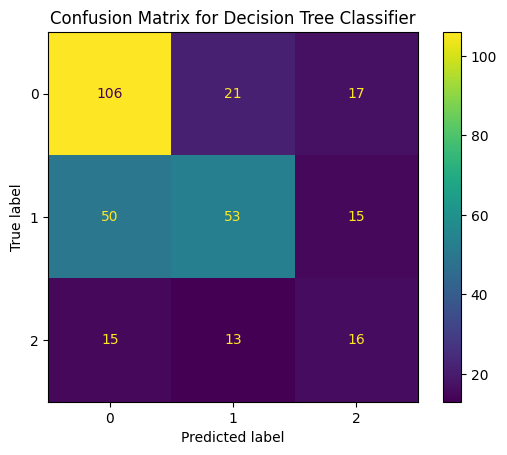

In [241]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix for the Decision Tree Classifier
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()



In [268]:
import joblib
# Dumping Decision Tree Classifier
joblib.dump(clf, 'dt_clf.pkl')

['dt_clf.pkl']

### Random Forest ###

In [269]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the Random Forest Classifier
clf = RandomForestClassifier(random_state=60, n_estimators=200, max_depth=100, min_samples_split=50, min_samples_leaf=5)
clf.fit(X_res_scaled, y_res)

# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Generate the classification report
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Classification Report for Random Forest Classifier:")
print(report)
print("Accuracy:", accuracy)


Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       144
           1       0.64      0.51      0.57       118
           2       0.18      0.16      0.17        44

    accuracy                           0.60       306
   macro avg       0.50      0.49      0.49       306
weighted avg       0.59      0.60      0.59       306

Accuracy: 0.6013071895424836


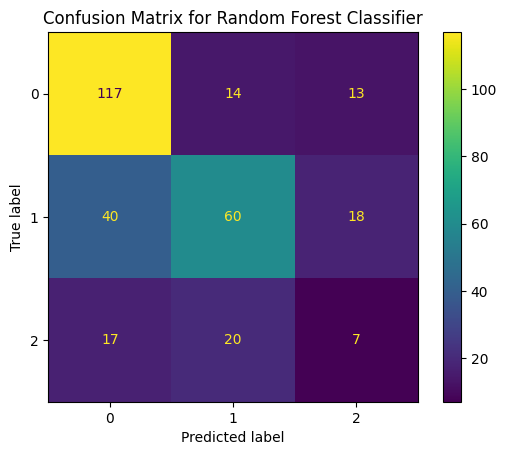

In [270]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix for the Random Forest Classifier
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()

plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [258]:
# Dumping Random Forest Classifier
joblib.dump(clf, 'rf_clf.pkl')

['rf_clf.pkl']

### Logistic Regression ###

### SVM (Support Vector Machine) ###

### Naive Bayes ###

### KNN Classifier ###

### XGBoost ###